In [1]:
from multiprocessing import Pool

import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem.Crippen import MolLogP

In [2]:
zinc_100k_df = pd.read_csv('100k_rndm_zinc_drugs_clean.txt', names=['smiles'])
lipo_df = pd.read_csv('Lipophilicity.csv')

In [3]:
def crippen_fn(smiles):
    mol = Chem.MolFromSmiles(smiles)
    crippen = MolLogP(mol)
    return crippen

In [4]:
zinc_100k_df['crippen_logp'] = zinc_100k_df['smiles'].apply(crippen_fn)
lipo_df['crippen_logp'] = lipo_df['smiles'].apply(crippen_fn)

In [5]:
# zinc_100k_eval_idxs = np.random.choice(len(zinc_100k_df), size=int(len(zinc_100k_df) * 0.05))
# zinc_100k_df_train = zinc_100k_df.loc[~zinc_100k_df.index.isin(zinc_100k_eval_idxs)]
# zinc_100k_df_eval = zinc_100k_df.iloc[zinc_100k_eval_idxs]
# zinc_100k_df_train.to_csv('zinc_100k_train.csv')
# zinc_100k_df_eval.to_csv('zinc_100k_df_eval.csv')

In [6]:
all_logps = np.concatenate((zinc_100k_df['crippen_logp'].values, lipo_df['crippen_logp'].values))

n_bins = 50
bins = np.linspace(all_logps.min(), all_logps.max(), n_bins)

zinc_weights, zinc_bins =  np.histogram(zinc_100k_df['crippen_logp'].values, density=True, bins=bins)
lipo_weights, lipo_bins = np.histogram(lipo_df['crippen_logp'].values, density=True, bins=bins)

In [7]:
reweights = np.divide(lipo_weights, zinc_weights, out=np.zeros_like(lipo_weights), where=zinc_weights!=0)
reweights = reweights[np.clip(np.digitize(zinc_100k_df['crippen_logp'].values, bins, right=True) - 1, 0, n_bins)]
reweights = reweights / reweights.sum()
zinc_100k_df['p'] = reweights

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


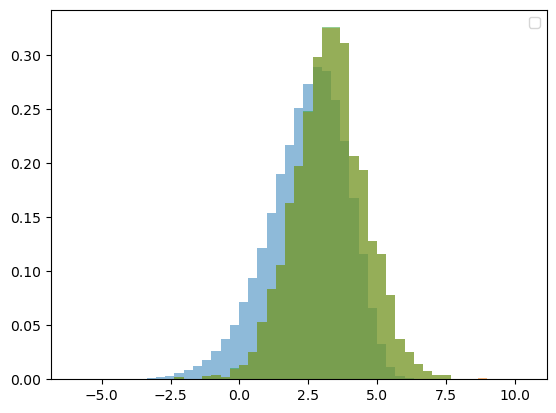

In [8]:
plt.stairs(
    zinc_weights,
    zinc_bins,
    fill=True,
    alpha=0.5
)
plt.stairs(
    lipo_weights,
    lipo_bins,
    fill=True,
    alpha=0.5
)
plt.stairs(
    *np.histogram(zinc_100k_df['crippen_logp'].values, density=True, bins=bins, weights=zinc_100k_df['p']),
    fill=True,
    alpha=0.5
)
plt.legend()
plt.show()

In [9]:
zinc_100k_df.to_csv('zinc_100k_crippen_matched_50_bins.csv')

In [10]:
reweights = np.divide(1, zinc_weights, out=np.zeros_like(lipo_weights), where=zinc_weights!=0)
reweights = reweights[np.clip(np.digitize(zinc_100k_df['crippen_logp'].values, bins, right=True) - 1, 0, n_bins)]
reweights = reweights / reweights.sum()
zinc_100k_df['p'] = reweights

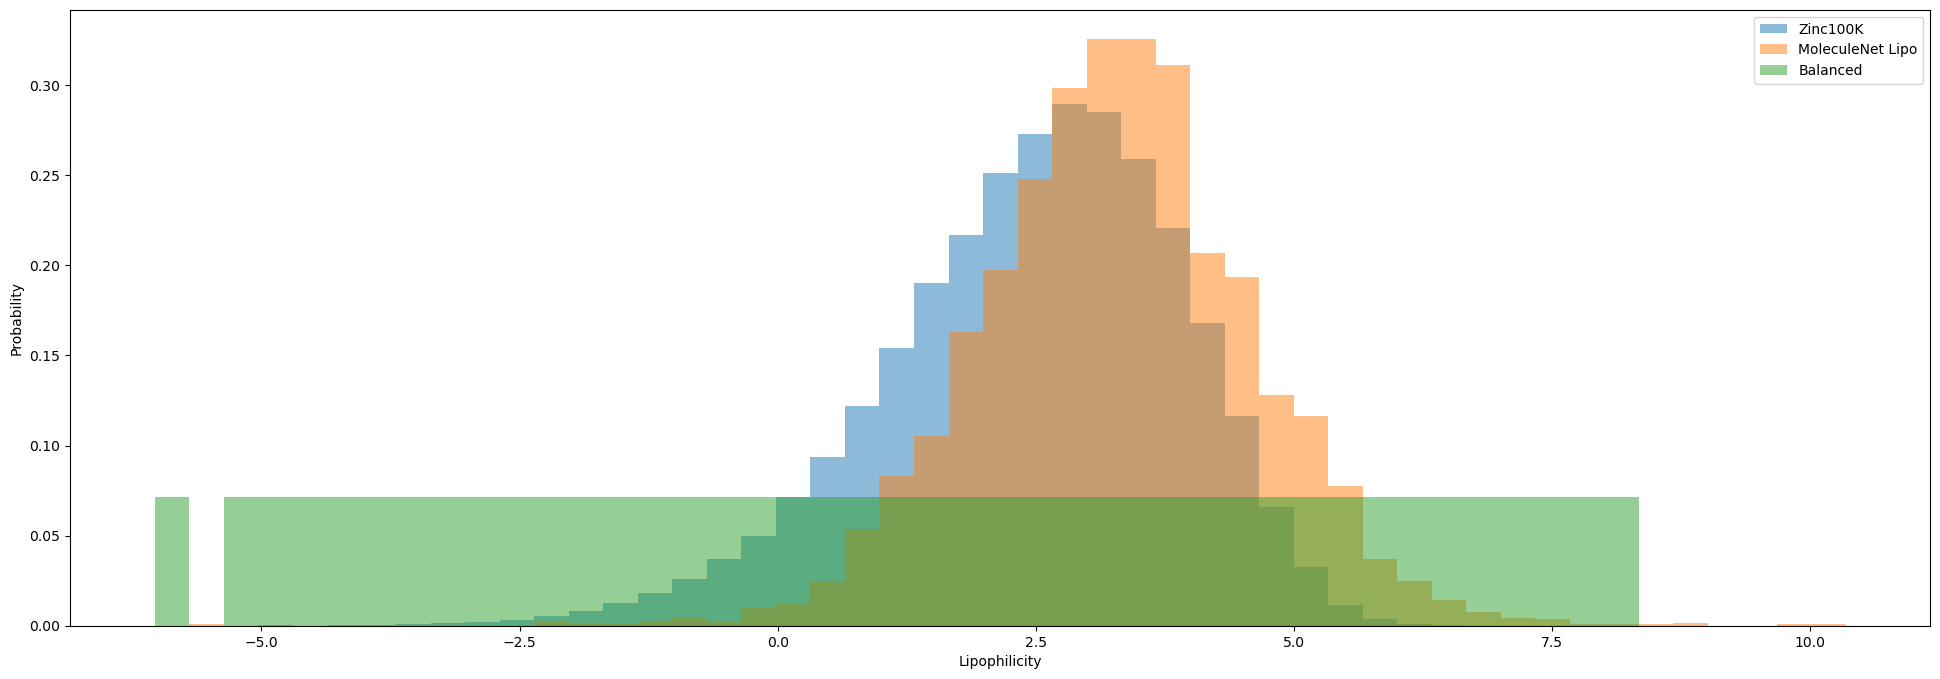

In [20]:
plt.figure(figsize=(24,8))
plt.stairs(
    zinc_weights,
    zinc_bins,
    fill=True,
    alpha=0.5,
    label='Zinc100K'
)
plt.stairs(
    lipo_weights,
    lipo_bins,
    fill=True,
    alpha=0.5,
    label='MoleculeNet Lipo'
)
plt.xlabel('Lipophilicity')
plt.ylabel('Probability')

plt.stairs(
    *np.histogram(zinc_100k_df['crippen_logp'].values, density=True, bins=bins, weights=zinc_100k_df['p']),
    fill=True,
    alpha=0.5,
    label='Balanced'
)
plt.legend()
plt.show()

In [16]:
zinc_100k_df.to_csv('zinc_100k_crippen_balanced_50_bins.csv')

In [19]:
zinc_100k_df['p'] = 1 / len(zinc_100k_df)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


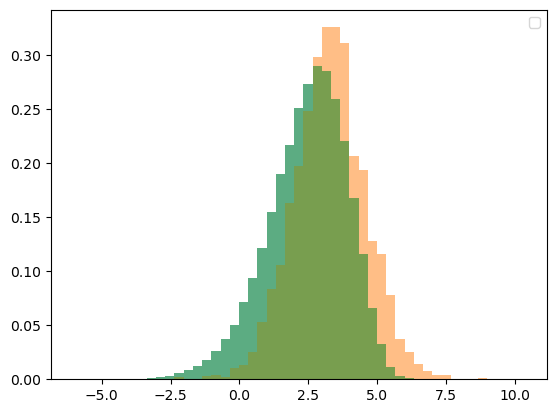

In [22]:
plt.stairs(
    zinc_weights,
    zinc_bins,
    fill=True,
    alpha=0.5
)
plt.stairs(
    lipo_weights,
    lipo_bins,
    fill=True,
    alpha=0.5
)
plt.stairs(
    *np.histogram(zinc_100k_df['crippen_logp'].values, density=True, bins=bins, weights=zinc_100k_df['p']),
    fill=True,
    alpha=0.5
)
plt.legend()
plt.show()

In [30]:
zinc_100k_df

,smiles,crippen_logp,p
0,CC(C)(C)c1ccc2occ(CC(=O)Nc3ccccc3F)c2c1,5.05060,0.00001
1,C[C@@H]1CC(Nc2cncc(-c3nncn3C)c2)C[C@@H](C)C1,3.11370,0.00001
2,N#Cc1ccc(-c2ccc(O[C@@H](C(=O)N3CCCC3)c3ccccc3)...,4.96778,0.00001
3,CCOC(=O)[C@@H]1CCCN(C(=O)c2nc(-c3ccc(C)cc3)n3c...,4.00022,0.00001
4,N#CC1=C(SCC(=O)Nc2cccc(Cl)c2)N=C([O-])[C@H](C#...,3.60956,0.00001
...,...,...,...
99995,Cc1nc(C[NH+]2CCC[C@@H]2c2c(C)n[nH]c2C)sc1C,2.01988,0.00001
99996,CC(C)(O)CNC(=O)NCCCCC1CCCC1,2.41700,0.00001
99997,Cc1c(CCC(=O)NCCN2CCOCC2)c(=O)oc2cc3oc4c(c3cc12...,3.10742,0.00001
99998,C=CCC[C@H](C)OC(=O)c1sc(-c2c(C)c(C)nn(C)c2=O)nc1C,3.34056,0.00001


In [23]:
zinc_100k_df.to_csv('zinc_100k_uniform.csv')

In [31]:
lipo_df.to_csv('lipo.csv', columns=['smiles', 'exp', 'crippen_logp'], index=False)